In [2]:
import torch
import torchvision
from torch import nn
from torchvision.models.detection import KeypointRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision import transforms

import sys, os
sys.path.append(os.path.join('..'))
import lib
from dataset import custom_transforms

sys.path.append(os.path.join('..','lib','dataset'))

import lib
from dataset import PoseDataset

from matplotlib import pyplot as plt
import numpy as np

In [14]:
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from torchvision.models.utils import load_state_dict_from_url
model_urls = {
    # legacy model for BC reasons, see https://github.com/pytorch/vision/issues/1606
    'keypointrcnn_resnet50_fpn_coco_legacy':
        'https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-9f466800.pth',
    'keypointrcnn_resnet50_fpn_coco':
        'https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth',
}

In [16]:
pretrained_backbone = False
num_classes = 2
num_keypoints = 14
backbone = resnet_fpn_backbone('resnet50', pretrained_backbone)
model = KeypointRCNN(backbone, num_classes, num_keypoints=num_keypoints)
key = 'keypointrcnn_resnet50_fpn_coco'
state_dict = load_state_dict_from_url(model_urls[key], progress=True)
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for KeypointRCNN:
	size mismatch for roi_heads.keypoint_predictor.kps_score_lowres.weight: copying a param with shape torch.Size([512, 17, 4, 4]) from checkpoint, the shape in current model is torch.Size([512, 14, 4, 4]).
	size mismatch for roi_heads.keypoint_predictor.kps_score_lowres.bias: copying a param with shape torch.Size([17]) from checkpoint, the shape in current model is torch.Size([14]).

from torchvision.models.detection.keypoint_rcnn import keypointrcnn_resnet50_fpn

In [26]:
from torchvision.models.detection.keypoint_rcnn import keypointrcnn_resnet50_fpn
model_rn50_fpn = keypointrcnn_resnet50_fpn(pretrained=True, progress=True,
                              num_classes=2, num_keypoints=17,
                              pretrained_backbone=True)
model_rn50_fpn.eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )


In [30]:
transform=transforms.Compose([custom_transforms.DictToTensor()])
dataset = PoseDataset.PoseDataset(['../../data/vzf/freestyle/freestyle_1'], 3, transform=transform)

In [38]:
ind = 20
prediction = model_rn50_fpn([dataset[ind]['image']])

In [39]:
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']
keypoints = prediction[0]['keypoints']

0.7942613363265991


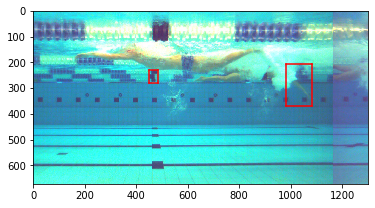

In [41]:
plt.figure()
# show image
plt.imshow(dataset[ind]['image'].permute(1,2,0).detach().numpy())
max_score = 0
max_box = []
for idx, box in enumerate(boxes):
    if scores[idx].item() > max_score:
        max_score = scores[idx].item()
        max_box = box
print(max_score)
for box in boxes[np.where(scores > .)]:

    # add keypoints to imag
        # TODO: add color coding for different body parts
        
        # draw lines as specified in skeleton 
    
    plt.plot([box[0], box[2]], [box[1], box[1]], c='r')
    plt.plot([box[0], box[2]], [box[3], box[3]], c='r')
    plt.plot([box[0], box[0]], [box[1], box[3]], c='r')
    plt.plot([box[2], box[2]], [box[1], box[3]], c='r')


        # pause a bit so that plots are updated
plt.pause(0.001)  
        
        # display
plt.show(block=True)